<a href="https://colab.research.google.com/github/Vasya11111/MLproject/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import svm


# For Model Building
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Загрузка и анализ набора данных

In [2]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

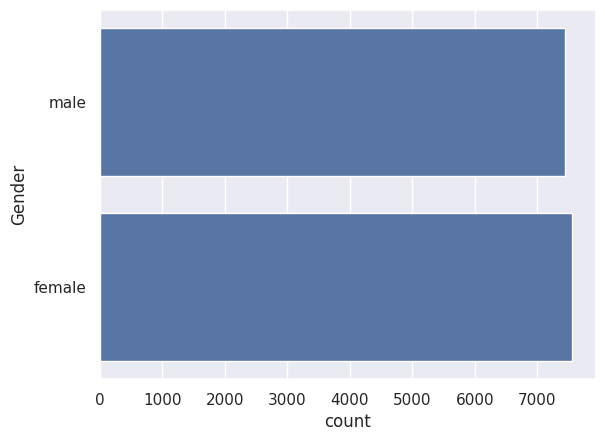

In [ ]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

<ipython-input-13-6cbf196d4d06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

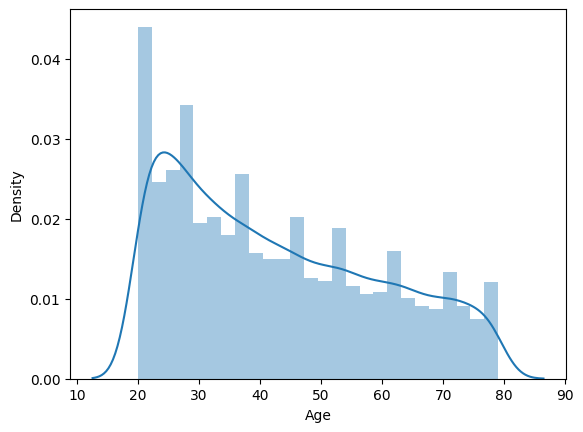

In [ ]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-42-fdc2a1fecb6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

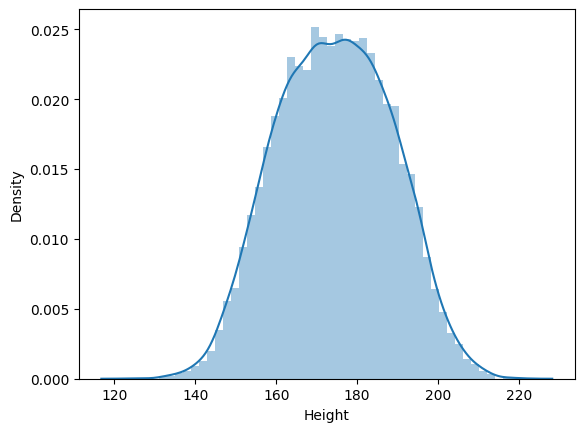

In [ ]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

<ipython-input-41-ac6457c483b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

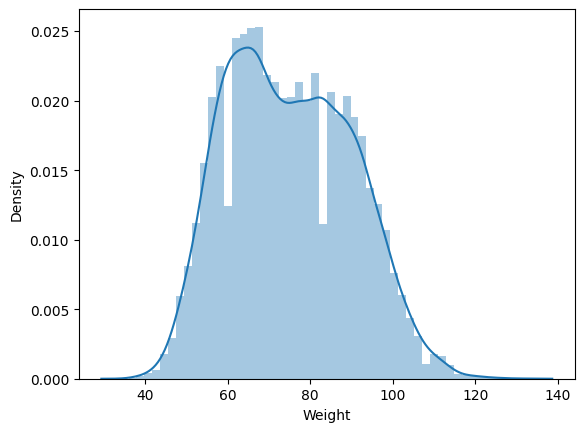

In [ ]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Нахождение корреляций

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<Axes: >

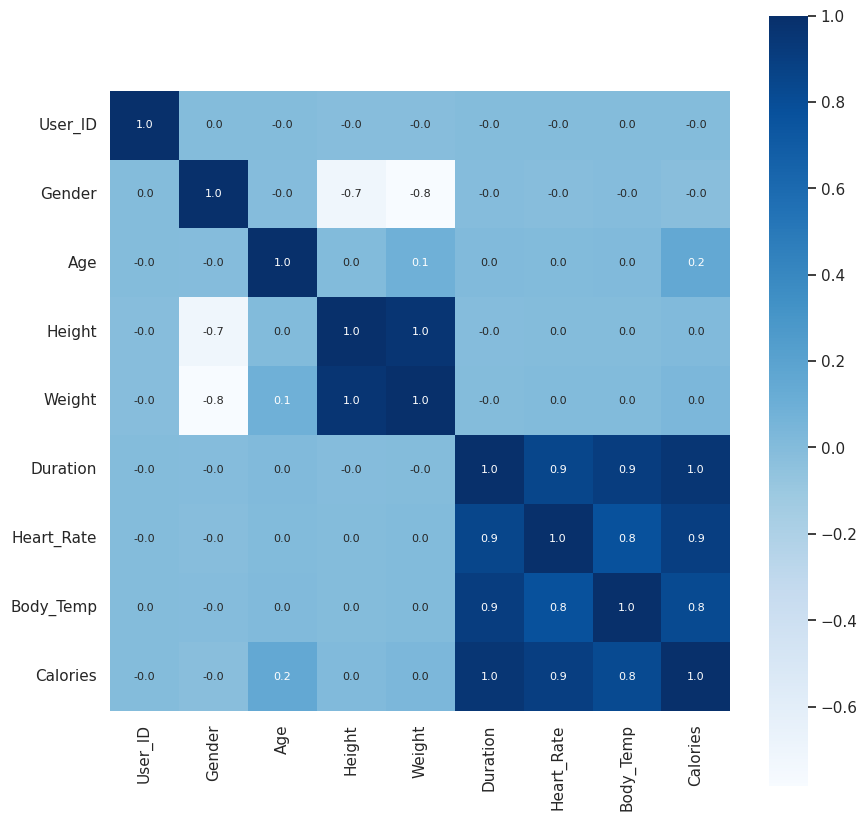

In [ ]:
# constructing a heatmap to understand the correlation
correlation = calories_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Преобразование текстовых данных в числовые

Подготовка данных

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Разделение на тестовую и обучающую выборки

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, Y, test_size=0.2, random_state=2)

In [ ]:
model2=LinearRegression()

model2.fit (X_train, Y_train)

Y_pred = model2.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))

Средний процент ошибки:   27.786395501397614  %
Среднее модуля ошибки:   8.385188053147187


In [ ]:

model1=svm.SVR()

model1.fit (X_train, Y_train)

Y_pred = model1.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))


Средний процент ошибки:   8.436078494989248  %
Среднее модуля ошибки:   2.360895387240664


In [ ]:

model1=svm.SVR(C=200.0)

model1.fit (X_train, Y_train)

Y_pred = model1.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))

Средний процент ошибки:   3.998469103707938  %
Среднее модуля ошибки:   2.2130588406932246


In [ ]:

model1=svm.SVR(gamma=1e-3,C=200.0)

model1.fit (X_train, Y_train)

Y_pred = model1.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))


Средний процент ошибки:   1.2634917641955894  %
Среднее модуля ошибки:   0.4587422829750608


In [ ]:

model1=svm.SVR(gamma=5e-2,C=200.0)

model1.fit (X_train, Y_train)

Y_pred = model1.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))

Средний процент ошибки:   0.9914500494002446  %
Среднее модуля ошибки:   0.353499037455876


In [ ]:
dif=abs((Y_test-Y_pred))
#dif=Y_test+Y_pred-Y_test
#dif=Y_pred
dif


7592     0.003384
3551     0.000425
9698     0.009653
3759     0.008183
2353     0.000996
           ...   
8859     0.004654
2886     0.000893
14357    0.002141
9430     0.000528
11870    0.003017
Name: Calories, Length: 3000, dtype: float64

In [ ]:
sorted_series = dif.sort_values()

print(sorted_series)

7955     0.000002
8645     0.000002
5477     0.000003
2065     0.000007
12397    0.000010
           ...   
8295     0.221778
12659    0.244224
14147    0.360243
4703     0.485398
6711     0.496491
Name: Calories, Length: 3000, dtype: float64


In [ ]:
print(type(dif))
joins = pd.concat([X_test, dif], axis=1)

#value = X.iloc[2705, 6]
#value = Y.iloc[2705]

#print(value)0	24	160.0	61.0	1.0	77.0	37.7

<class 'pandas.core.series.Series'>


In [ ]:
joins[joins.Calories >0.4]
#joins[joins.Body_Temp ==37.7]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
4703,1,75,174.0,77.0,1.0,73.0,37.3,0.485398
6711,0,40,218.0,132.0,1.0,88.0,37.8,0.496491


In [ ]:
joins[joins.Height>195]['Calories'].mean()

0.3969135845264323

In [ ]:
Y_predOne = model1.predict([[0,30,180.0,90.0,10.0,110.0,37.8]])



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [4]:
print("Ожидаемый расход калорий: ",Y_predOne[0])

NameError: name 'Y_predOne' is not defined

In [ ]:
regression_metrics_df = pd.DataFrame({
    "Погрешность SVR": ["MeanAbs(kcal)", "MeanAbsPercent(%)"],
    "Начальная":[10.62,26.76],
    "Масштабирование": [2.36,8.44],
    "Подбор C":[0.3,1.04],
    "Подбор gamma": [0.28,0.84]
})

regression_metrics_df.set_index('Погрешность SVR', inplace=True)
regression_metrics_df

,Начальная,Масштабирование,Подбор C,Подбор gamma
Погрешность SVR,,,,
MeanAbs(kcal),10.62,2.36,0.30,0.28
MeanAbsPercent(%),26.76,8.44,1.04,0.84
